# First Part (Data Collection)

In [ ]:
""" Import Python Modules """
import pandas as pd #Module for handling dataframes.
from pmaw import PushshiftAPI #Module for connecting to the Pushshift Reddit API.

""" Parameters for the Pushshift Reddit API """
subreddit = "mentalillness" #Specify the subreddit name (BPD, bipolar, depression, anxiety, schizophrenia).
limit = 100000 #Specify number of rows.

""" Calling the API to retrieve the data """
submissions = api.search_submissions(subreddit=subreddit, limit=limit) 
#Retrieve the Reddit data from the API.

""" Processing the data """
df = pd.DataFrame(submissions) #Convert data received to a pandas dataframe.

In [ ]:
df_0 = pd.read_excel("BPD.xlsx", engine='openpyxl')
df_1 = pd.read_excel("bipolar.xlsx", engine='openpyxl')
df_2 = pd.read_excel("depression.xlsx", engine='openpyxl')
df_3 = pd.read_excel("Anxiety.xlsx", engine='openpyxl')
df_4 = pd.read_excel("schizophrenia.xlsx", engine='openpyxl')

In [ ]:
df_0 = df_0[["title", "selftext", "created_utc", "over_18", "upvote_ratio", "subreddit"]]
df_1 = df_1[["title", "selftext", "created_utc", "over_18", "upvote_ratio", "subreddit"]]
df_2 = df_2[["title", "selftext", "created_utc", "over_18", "upvote_ratio", "subreddit"]]
df_3 = df_3[["title", "selftext", "created_utc", "over_18", "upvote_ratio", "subreddit"]]
df_4 = df_4[["title", "selftext", "created_utc", "over_18", "upvote_ratio", "subreddit"]]
df_5 = df[["title", "selftext", "created_utc", "over_18", "upvote_ratio", "subreddit"]]

In [ ]:
print(len(df_0.index))
print(len(df_1.index))
print(len(df_2.index))
print(len(df_3.index))
print(len(df_4.index))

241116
51112
156972
173990
25365


In [ ]:
combined_df = pd.concat([df_0, df_1, df_2, df_3, df_4, df])

In [ ]:
combined_df["subreddit"].value_counts()

BPD              241116
Anxiety          173990
depression       156972
mentalillness     53232
bipolar           51112
schizophrenia     25365
Name: subreddit, dtype: int64

In [ ]:
combined_df.to_excel("mental_disorders_reddit.xlsx", index=False)

In [ ]:
mental_disorders_reddit = combined_df[["title", "selftext", "created_utc", "over_18", "subreddit"]]

In [ ]:
mental_disorders_reddit.to_csv("mental_disorders_reddit.csv", index=False)

In [ ]:
mental_disorders_reddit["subreddit"].value_counts()

BPD              241116
Anxiety          173990
depression       156972
mentalillness     53232
bipolar           51112
schizophrenia     25365
Name: subreddit, dtype: int64

In [ ]:
test = pd.read_csv("mental_disorders_reddit.csv")

In [ ]:
test["subreddit"].value_counts()

BPD              241116
Anxiety          173990
depression       156972
mentalillness     53232
bipolar           51112
schizophrenia     25365
Name: subreddit, dtype: int64

In [ ]:
test.to_parquet('FINAL_DATA_WITH_SUBREDDIT.parquet')

# Second Part (Data Preprocessing & Modelling)

In [ ]:
df = pd.read_parquet('FINAL_DATA_WITH_SUBREDDIT.parquet', engine='pyarrow')
df

,created_utc,title,selftext,subreddit
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness
1,1624921897,I just need to talk to someone about something...,,mentalillness
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness
...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia


In [ ]:
print(df.size)
print(len(df.index))
print((df["title"].values == '').sum())
print((df["selftext"].values == '').sum())
print((df["selftext"].values == "[removed]").sum())

2157415
431483
0
43486
52121


In [ ]:
text_data = []
for index, row in df.iterrows():
    title = row["title"]
    selftext = row["selftext"]
    
    if selftext == "[removed]":
        data = title
    elif selftext == "[deleted]":
        data = title
    else:
        try:
          if (math.isnan(selftext)):
            data = title
        except:
          data = f"{title} {selftext}"
  
    text_data.append(data)

In [ ]:
print(len(text_data))

431483


In [ ]:
df["appended"] = text_data

In [ ]:
df

,created_utc,title,selftext,subreddit,appended
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ..."
...,...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia,Has anyone else succeeded with holistic method...
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia,Help me with symptoms. I don't think I have sc...
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia,How does schizophrenia usually start? On Dec. ...
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia,"If I were talking to myself, would I realize i..."


Remove duplicates (Removed 8532 documents) ✅
Remove wall related text (Removed 1223) ✅
Filter elongated text ✅
Apply custom filtering ✅
Apply clean text functions ✅ (Take care of non-ascii characters [remove])
Apply stop words ✅
Lemmatization ✅

Tokenization
LSA/LDA ==> Supervised

Supervised

In [ ]:
df = df.drop_duplicates(subset=['appended'], keep='first')
df

,created_utc,title,selftext,subreddit,appended
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ..."
...,...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia,Has anyone else succeeded with holistic method...
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia,Help me with symptoms. I don't think I have sc...
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia,How does schizophrenia usually start? On Dec. ...
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia,"If I were talking to myself, would I realize i..."


In [ ]:
%%time
wall_list = []
remove_list = []

for index, row in df.iterrows():
    
    text = row["appended"]
    if("in your wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("inside your wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("inyourwall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("insideyourwall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("in the wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("inthewall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("in my wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("inmywall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("inside your house" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("insideyourhouse" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("livinginyourwall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("in you're wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("i can see you i can see you" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("in ur wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("your drywall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("in your floorboard" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("inyourfloorboard" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("under your floorboard" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("underyourfloorboard" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("in your house" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("inyourhouse" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("i am your wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("iamyourwall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("inside of your walls" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove") 
    elif("checkyourwalls" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("check your wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("i’m your walls" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("iamlivingyourwalls" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("living jn your walls" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("livingjnyourwalls" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("ungha ungha" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("ungha ungha" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("ungha ungha" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("im your wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("look behind your wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("in side your wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("hi from your walls" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("check your floorboards" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    elif("in you wall" in text.lower()):
        wall_list.append("remove")
        remove_list.append("remove")
    else:
        wall_list.append("keep")

CPU times: total: 28.3 s
Wall time: 28.4 s


In [ ]:
print(len(remove_list))

1223


In [ ]:
df["check_wall"] = wall_list
df

C:\Users\Kamarul Adha\AppData\Local\Temp\ipykernel_2500\982665659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["check_wall"] = wall_list


,created_utc,title,selftext,subreddit,appended,check_wall
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...,keep
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...,keep
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...,keep
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...,keep
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ...",keep
...,...,...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia,Has anyone else succeeded with holistic method...,keep
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia,Help me with symptoms. I don't think I have sc...,keep
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia,How does schizophrenia usually start? On Dec. ...,keep
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia,"If I were talking to myself, would I realize i...",keep


In [ ]:
df = df[df.check_wall != "remove"]
df

,created_utc,title,selftext,subreddit,appended,check_wall
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...,keep
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...,keep
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...,keep
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...,keep
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ...",keep
...,...,...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia,Has anyone else succeeded with holistic method...,keep
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia,Help me with symptoms. I don't think I have sc...,keep
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia,How does schizophrenia usually start? On Dec. ...,keep
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia,"If I were talking to myself, would I realize i...",keep


In [ ]:
for index, row in test.iterrows():    
    text = row["appended"]
    if ("you wall" in text.lower()):
        print(text)
        print()

I love working in a warehouse for a shit home just to ignore eachother and be upset. I genuinely am out of fucking gas.  I can't take it. I'm depressed.  I'm tired.  I'm trying.  

I hate my job.  I hate San Bernardino.  I hate myself, and my car, and my life.

I go to a job I hate, that I dropped out of school for, to support my girlfriend and I moving in together.  It's miserable.  It's fucking terrible but I try to stay positive talking to people.  This is one of America's worst corporations.

I come home, she's fucking ignoring me.  Lost something again.  Won't take her adderall.  Won't talk to me, and if she does, it's probably to bitch.  There's shit on the floor and piss from the dog.  I can't believe how this place looks like a crackden sometimes.

I fucking hate the dog.  I hate you wally.  I show you love, I show you care, but you drive a wedge in everything.  My empathy for him has run dry, he's disabled and diabetic, and I won't mistreat or neglect him; but I can't fucking 

In [ ]:
counter = 0
for index, row in df.iterrows():    
    text = row["appended"]
    if ("scaffolding" in text.lower()):
        counter+=1
        print(index)
        print(text)
        print("=====")

39663
I can't remember feelings, or a ton of other day-to-day things, and it's ruining my life. I think I need an actual CT scan or an MRI or something. I feel like there has to be something damaged or malfunctioning in my brain.

Nothing "stays with me."

I can't remember what song I want to hear, what word I want to use, what movies are like this or that, what lessons I should have ingrained by now, what expressions to use in a given moment, what I should take from life moments, what points to cite in disagreements, what someone said two sentences ago, what the plot of the ongoing movie is, what I should've just learned in any explanation stated in any grade level, and on and on and on.

It is devastating. No amount of exercise, dietary changes, or professional help seems to work. I'm just constantly in a deep fog that I can only imagine goes far beyond the "brain fog" I hear about a lot. This fog has me unable to remember, learn, or feel most of the time. I just exist back here behi

55745
I’m in such an anxious state The flimsy scaffolding of my psychology is collapsing. I’ve got this ear ache thing which is destroying me. And I’m so anxious as I don’t think I can cope with it anymore. I know it’s probably not actually that bad. It’s the anticipation that is killing me. And the decision to see a doctor after it was getting better and they poked around and made it flare up again. Why didn’t I cancel? Can’t sleep can barely type I’m shaking

Any advice gratefully received.
=====
32197
Looking for a better job. Submitted my resume to over a dozen places yesterday I've been working with DVR and they suck man. 3mos and no new job. I only get what i put in though. I fired my resume to any entry level job &gt;$17hr &gt;$35yr requiring/suggesting an AA or BA degree. I would like to own a car again soon. Speed and msnia to a degree. Speed and mania is gonna fuck me in the long run. Every somewhat successful bipolar person I know coming from a blue collar background is work

44822
SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDING SCAFFOLDIN

In [ ]:
print(counter)

8


In [ ]:
df.to_excel("FINAL DATA_no_wall.xlsx", index=False, engine="xlsxwriter")

D:\Python\venv\lib\site-packages\xlsxwriter\worksheet.py:1170: UserWarning: Ignoring URL 'https://preview.redd.it/5kvh46jtzng81.png?width=2360&amp;format=png&amp;auto=webp&amp;s=20da27c9f283387b23ff5288f6b0296c0ff8ff2a

Hello,%20I%20am%20working%20on%20a%20solution%20to%20help%20my%20partner%20(who%20has%20BPD)%20and%20those%20around%20me%20with%20dissociation.%20I%20want%20to%20try%20and%20come%20up%20with%20a%20solution%20for%20them%20before%20they%20dissociate%20and%20as%20a%20Product%20Design%20Student%20from%20Bournemouth%20University,%20make%20this%20as%20a%20product.%20I%20have%20been%20in%20contact%20with%20several%20therapists,%20and%20done%20extensive%20research%20and%20understand%20that%20the%20best%20solution%20is%20something%20that%20incorporates%20all%20the%20senses%20whilst%20also%20allowing%20the%20user%20to%20build%20and%20customise%20a%20variety%20of%20grounding%20techniques%20to%20practice%20the%20right%20one%20for%20themselves.%20I%20truly%20believe%20that%20this%20

D:\Python\venv\lib\site-packages\xlsxwriter\worksheet.py:1170: UserWarning: Ignoring URL 'https://www.attachmentproject.com/blog/disorganized-attachment/

I%20had%20a%20good%20cry,%20but%20I'm%20honestly%20glad%20I%20gave%20this%20knowledge%20in%20my%20tool%20belt.%20I'm%20not%20sure%20I'm%20ready%20to%20confront%20my%20parents%20about%20how%20much%20I%20resent%20and%20fear%20them,%20or%20to%20address%20my%20fraught%20relationship%20with%20my%20sibling%20as%20far%20as%20feeling%20emotionally%20responsible%20for%20his%20self-esteem?%20It's%20a%20lot%20to%20grapple%20with.%20


Maybe%20I%20can%20try%20to%20get%20us%20all%20through%20family%20therapy.%20I%20am%20afraid%20of%20how%20it%20will%20go.%20But%20I%20want%20to%20know%20if%20my%20relationship%20with%20these%20people%20is%20worth%20that%20to%20me.%20I%20feel%20so%20confused%20and%20ashamed%20for%20how%20I%20feel.%20Deep%20down,%20though,%20I%20know%20it%20isn't%20all%20my%20fault%20that%20I'm%20like%20this.%20I%20just%20love%20them

D:\Python\venv\lib\site-packages\xlsxwriter\worksheet.py:1170: UserWarning: Ignoring URL 'https://youtu.be/F7VlJyrELz0

Fear%20hits%20like%20a%20drug%20in%20the%20veins
Hard%20to%20stop%20like%20a%20runaway%20train
Look%20around%20but%20there's%20nobody%20to%20blame
Oh,%20what%20a%20shame

Spending%20nights%20just%20staring%20at%20the%20wall
Pay%20no%20mind%20to%20the%20demons%20in%20the%20hall
Yeah,%20I'm%20numb%20I%20don't%20feel%20nothing%20at%20all
Braced%20for%20the%20fall

Try%20to%20calm%20myself%20down%20but%20I%20feel%20the%20panic
Is%20it%20all%20up%20in%20my%20head,%20am%20I%20going%20manic?
Try%20to%20calm%20myself%20down%20but%20I%20feel%20the%20panic
Is%20it%20all%20up%20in%20my%20head?

Manic
Manic

It's%20a%20war%20but%20I'm%20never%20on%20attack
Holding%20on,%20but%20I'm%20slipping%20through%20the%20cracks
Don't%20wanna%20be%20another%20body%20in%20the%20stack
I'm%20never%20coming%20back

Spending%20nights%20just%20staring%20at%20the%20wall
Pay%20no%20mind%20to%20the%2

D:\Python\venv\lib\site-packages\xlsxwriter\worksheet.py:1170: UserWarning: Ignoring URL 'https://www.ridofdepression.com/anxiety-attack-vs-panic-attack/%20%20%20

***Anxiety%20Attack%20vs%20Panic%20Attack***

“Anxiety%20attack%20vs%20panic%20attack.”%20you%20say

The%20definition%20of%20a%20“panic%20attack”%20comes%20straight%20from%20Webster’s%20dictionary:

%5bAnxiety%20attack%5d(https://www.ridofdepression.com/)%20is%20a%20medical%20condition%20in%20which%20excessive%20anxiety%20and%20a%20drop%20in%20breathing%20occur%20frequently.

There%20are%20many%20different%20kinds%20of%20anxiety%20attack

A%20sense%20of%20shortness%20of%20breath%20is%20the%20most%20common%20symptom%20of%20a%20%5bpanic%20attack%5d(https://www.ridofdepression.com/shop/).

Anxiety%20is%20a%20feeling%20of%20unease%20or%20anxiousness,%20sometimes%20accompanied%20by%20tension,%20usually%20defined%20as%20a%20feeling%20of%20tension%20and%20discomfort%20or%20worry%20about%20an%20unpleasant%20or%20expected%20outcome.


In [ ]:
df.to_parquet('FINAL_DATA_no_wall.parquet')

In [ ]:
import pandas as pd
import math
import contractions as cons
import numpy as np
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

In [ ]:
df = pd.read_parquet('FINAL_DATA_no_wall.parquet', engine='pyarrow')
df

,created_utc,title,selftext,subreddit,appended,check_wall
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...,keep
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...,keep
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...,keep
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...,keep
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ...",keep
...,...,...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia,Has anyone else succeeded with holistic method...,keep
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia,Help me with symptoms. I don't think I have sc...,keep
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia,How does schizophrenia usually start? On Dec. ...,keep
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia,"If I were talking to myself, would I realize i...",keep


In [ ]:
word_dict = {
    "OCD": "obsessive-compulsive-disorder",
    "ocd": "obsessive-compulsive-disorder",
    "ADHD": "attention-deficit-hyperactivity-disorder",
    "adhd": "attention-deficit-hyperactivity-disorder",
    "rlly": "really",
    "PDD": "persistent-depressive-disorder",
    "pdd": "persistent-depressive-disorder",
    "aka": "also known as",
    "bpd": "borderline-personality-disorder",
    "BPD": "borderline-personality-disorder",
    "DAE": "does anyone else",
    "fuked": "fucked",
    "f##k": "fuck",
    "fk": "fuck",
    "fkn": "fucking",
    "AFK": "away from keyboard",
    "afk": "away from keyboard",
    "GP": "general practitioner",
    "w": "with",
    "PTSD": "post-traumatic-stress-disorder",
    "ptsd": "post-traumatic-stress-disorder",
    "rn": "right now",
    "SSRI": "selective-serotonin-reuptake-inhibitors",
    "ssri": "selective serotonin-reuptake-inhibitors",
    "tbh": "to be honest",
    "i.e.": "that is",
    "i.e": "that is",
    "SO": "significant other",
    "LSD": "drug",
    "lsd": "drug",
    "Omg": "oh my god",
    "omg": "oh my god",
    "OMG": "oh my god",
    "idk": "i do not know",
    "IDK": "i do not know",
    "CPTSD": "complex-post-traumatic-stress-disorder",
    "cptsd": "complex-post-traumatic-stress-disorder",
    "cPTSD": "complex-post-traumatic-stress-disorder",
    "GAD": "generalized-anxiety-disorder",
    "gad": "generalized-anxiety-disorder",
    "MDD": "major-depressive-disorder",
    "mdd": "major-depressive-disorder",
    "AITA": "am i the asshole",
    "aita": "am i the asshole",
    "DID": "dissociative-idenity-disorder",
    "ODD": "oppositional-defiant-disorder",
    "odd": "oppositional-defiant-disorder",
    "plz": "please",
    "pls": "please",
    "PLEASE": "please",
    "PLZ": "please",
    "PLS": "please",
    "EUPD": "emotionally-unstable-personality-disorder",
    "eupd": "emotionally-unstable-personality-disorder",
    "DMDD": "disruptive-mood-dysregulation-disorder",
    "HOCD": "homosexual-obsessive-compulsive disorder",
    "hocd": "homosexual-obsessive-compulsive disorder",
    "TL;DR": "too long did not read",
    "tldr": "too long did not read",
    "TLDR": "too long did not read"
}

In [ ]:
# Python program to convert a list
# to string using join() function
    
# Function to convert  
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))
        
        
# Driver code    
# s = ['Geeks', 'for', 'Geeks']
# print(listToString(s)) 

In [ ]:
corpus = []
for index, row in df.iterrows():
    doc = row["appended"]
    try:
        if np.isnan(doc):
            pass
    except:
        texts = doc.split()
        filter_word = []
        for text in texts:
            temp = re.sub(r'(.)\1+', r'\1\1', text)

            if temp in word_dict.keys():
                temp = word_dict.get(temp)
                
            filter_word.append(temp)

#             if temp.lower() not in stop_words:
#                 filter_word.append(temp)

        corpus.append(listToString(filter_word))

In [ ]:
print(len(corpus))

421728


In [ ]:
df["filtered_keywords"] = corpus
df

,created_utc,title,selftext,subreddit,appended,check_wall,filtered_keywords
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...,keep,I am in so much pain I just want to feel numb ...
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...,keep,I just need to talk to someone about something...
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...,keep,Neighbors purposely pushing me over the edge s...
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...,keep,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ...",keep,"Sadness, Madness and Natural Selection (2020) ..."
...,...,...,...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia,Has anyone else succeeded with holistic method...,keep,Has anyone else succeeded with holistic method...
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia,Help me with symptoms. I don't think I have sc...,keep,Help me with symptoms. I don't think I have sc...
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia,How does schizophrenia usually start? On Dec. ...,keep,How does schizophrenia usually start? On Dec. ...
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia,"If I were talking to myself, would I realize i...",keep,"If I were talking to myself, would I realize i..."


In [ ]:
""" Convert &amp; to and """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("Q&amp;A", "question and answer "))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("&amp;", "and"))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("’", "'"))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("´", "'"))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("&lt;", "<"))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("&gt;", ">"))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("&quot;", '"'))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("&apos;", "'"))

""" Remove Non-ASCII Characters """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r'[^\x00-\x7F]', " ", x))

""" Clean Contractions """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: cons.fix(str(x)))

""" Remove Twitter Related Stuff """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r'@[\w]+',' ',x))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub("#[A-Za-z0-9_]+", " ", x))

""" Remove line breaks "\n" """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r'\n', " ", x))

""" Delete URL Links """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r'https?:\/\/\S+', ' ', x))

""" Delete Placeholders """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r'{link}', ' ', x))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r"\[video\]", ' ', x))

""" Remove Numbers """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r'[~^0-9]', "", x))


""" Remove Punctuation """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r'[^\w\s]',' ',x))

""" Remove spaces """
df.filtered_keywords = df.filtered_keywords.str.strip()

""" Filter Vaxx Slang """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("vax", "vaccine"))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("vaxx", "vaccine"))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("vaxxed", "vaccinated"))
df.filtered_keywords = df.filtered_keywords.apply(lambda x: str(x).replace("unvaxxed", "unvaccinated"))

""" Change ppl to people """
df.filtered_keywords = df.filtered_keywords.apply(lambda x: re.sub(r"\b\bppl", "people", x))

In [ ]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words("en"))
print(len(stop_words))

nltk_words = list(stopwords.words("english"))
print(len(nltk_words))

stop_words.extend(nltk_words)
print(len(stop_words))

stop_words = list(dict.fromkeys(stop_words))
stop_words.append("ugh")
print(len(stop_words))

174
179
353
212


In [ ]:
corpus = []
for index, row in df.iterrows():
    doc = row["filtered_keywords"]
    try:
        if np.isnan(doc):
            pass
    except:
        texts = doc.split()
        filter_word = []
        for text in texts:
            temp = re.sub(r'(.)\1+', r'\1\1', text)

#             if temp in word_dict.keys():
#                 temp = word_dict.get(temp)

            if temp.lower() not in stop_words:
                filter_word.append(temp)

        corpus.append(listToString(filter_word))

In [ ]:
print(len(corpus))
corpus

421728


['much pain want feel numb trying best drink seriously struggling today go work throwing morning feel terrible know',
 'need talk someone something really serious Anyone talk',
 'Neighbors purposely pushing edge snap end prison scumbag drug addict pill head crack head neighbors know mental illness informed purposely bang walls floor live stairs blast music time really think know going snap kill end prison Landlord give crap either social worker warned close going edge',
 'e p e n h e c n e e h e c n h e n',
 'Sadness Madness Natural Selection Randolph Nesse',
 'type therapy called called exposed something phobia scared build mental tolerance something like Know bugging day remember called',
 'Got Diagnosed Finally Granted still people turn forms confirm attention deficit hyperactivity disorder results got appointment hour ago went attention deficit hyperactivity disorder screening got closure much treated Persistent Depressive Disorder General Anxiety Disorder Today met criteria Inatte

In [ ]:
df["stop_words"] = corpus
df

,created_utc,title,selftext,subreddit,appended,check_wall,filtered_keywords,stop_words
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...,keep,I am in so much pain I just want to feel numb ...,much pain want feel numb trying best drink ser...
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...,keep,I just need to talk to someone about something...,need talk someone something really serious Any...
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...,keep,Neighbors purposely pushing me over the edge s...,Neighbors purposely pushing edge snap end pris...
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...,keep,ARE e p e n t T ...,e p e n h e c n e e h e c n h e n
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ...",keep,Sadness Madness and Natural Selection Rand...,Sadness Madness Natural Selection Randolph Nesse
...,...,...,...,...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia,Has anyone else succeeded with holistic method...,keep,Has anyone else succeeded with holistic method...,anyone else succeeded holistic methods backsto...
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia,Help me with symptoms. I don't think I have sc...,keep,Help me with symptoms I do not think I have s...,Help symptoms think schizophrenia think illnes...
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia,How does schizophrenia usually start? On Dec. ...,keep,How does schizophrenia usually start On Decem...,schizophrenia usually start December th starte...
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia,"If I were talking to myself, would I realize i...",keep,If I were talking to myself would I realize i...,talking realize public places random thought s...


In [ ]:
def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):

    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
lemmatizer = WordNetLemmatizer()

cleaned_text = []
for index, row in df.iterrows():
    temp = row["stop_words"]
    lemmatized_text = lemmatize_sentence(temp)
    cleaned_text.append(lemmatized_text)

# df["cleaned_text"] = cleaned_text

In [ ]:
print(len(cleaned_text))

421728


In [ ]:
df["lemmatized"] = cleaned_text
df

,created_utc,title,selftext,subreddit,appended,check_wall,filtered_keywords,stop_words,lemmatized
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...,keep,I am in so much pain I just want to feel numb ...,much pain want feel numb trying best drink ser...,much pain want feel numb try best drink seriou...
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...,keep,I just need to talk to someone about something...,need talk someone something really serious Any...,need talk someone something really serious Any...
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...,keep,Neighbors purposely pushing me over the edge s...,Neighbors purposely pushing edge snap end pris...,Neighbors purposely push edge snap end prison ...
3,1624917570,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋,T̷̯̖͑̊h̶̪͊ḛ̸́͂y̵̲̋ ̷̳̂̋c̶̰̗̽̆a̸̲͑͂n̵̛͚ ̵̗̮̆s̵...,mentalillness,R̶̲̄́e̷̱̊̓p̸̫͖̄͌e̶̜̠̅͘ṋ̸̞͝t̸̨̼̉̽ ̵̭̅͋ T̷̯̖͑̊h...,keep,ARE e p e n t T ...,e p e n h e c n e e h e c n h e n,e p e n h e c n e e h e c n h e n
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ...",keep,Sadness Madness and Natural Selection Rand...,Sadness Madness Natural Selection Randolph Nesse,Sadness Madness Natural Selection Randolph Nesse
...,...,...,...,...,...,...,...,...,...
86195,1353823398,Has anyone else succeeded with holistic method...,Phew...This is going to probably be very looke...,schizophrenia,Has anyone else succeeded with holistic method...,keep,Has anyone else succeeded with holistic method...,anyone else succeeded holistic methods backsto...,anyone else succeed holistic method backstory ...
86196,1356932500,Help me with symptoms. I don't think I have sc...,I have been diagnosed bipolar years ago. I hav...,schizophrenia,Help me with symptoms. I don't think I have sc...,keep,Help me with symptoms I do not think I have s...,Help symptoms think schizophrenia think illnes...,Help symptom think schizophrenia think illness...
86197,1356919868,How does schizophrenia usually start? On Dec. ...,"I'm a 21 year old lady, and my aunt is diagnos...",schizophrenia,How does schizophrenia usually start? On Dec. ...,keep,How does schizophrenia usually start On Decem...,schizophrenia usually start December th starte...,schizophrenia usually start December th start ...
86198,1356903480,"If I were talking to myself, would I realize it?",I'll be in public places and have a random tho...,schizophrenia,"If I were talking to myself, would I realize i...",keep,If I were talking to myself would I realize i...,talking realize public places random thought s...,talk realize public place random think somethi...


In [ ]:
df.to_parquet('FINAL_DATA_Lemmatized.parquet')

In [ ]:
#import modules
import pandas as pd
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import re

In [ ]:
df = pd.read_parquet('FINAL_DATA_Lemmatized_Latest.parquet', engine='pyarrow')

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation \
                                        , preprocess_string, strip_short, stem_text

# preprocess given text
def preprocess(text):
    
    # clean text based on given filters
#     CUSTOM_FILTERS = [lambda x: x.lower(), 
#                                 remove_stopwords, 
#                                 strip_punctuation, 
#                                 strip_short, 
#                                 stem_text]
    
    CUSTOM_FILTERS = [lambda x: x.lower(),
                                 strip_short]
    text = preprocess_string(text, CUSTOM_FILTERS)
    
    return text


# apply function to all reviews 
df['tokenized'] = df['lemmatized'].apply(lambda x: preprocess(x))
df.head()

,created_utc,title,selftext,subreddit,appended,check_wall,filtered_keywords,stop_words,lemmatized,check_empty,tokenized
0,1624922126,I am in so much pain,I just want to feel numb but im trying my best...,mentalillness,I am in so much pain I just want to feel numb ...,keep,I am in so much pain I just want to feel numb ...,much pain want feel numb trying best drink ser...,much pain want feel numb try best drink seriou...,keep,"[much, pain, want, feel, numb, try, best, drin..."
1,1624921897,I just need to talk to someone about something...,,mentalillness,I just need to talk to someone about something...,keep,I just need to talk to someone about something...,need talk someone something really serious Any...,need talk someone something really serious Any...,keep,"[need, talk, someone, something, really, serio..."
2,1624918822,Neighbors purposely pushing me over the edge s...,My scumbag drug addict pill head crack head ne...,mentalillness,Neighbors purposely pushing me over the edge s...,keep,Neighbors purposely pushing me over the edge s...,Neighbors purposely pushing edge snap end pris...,Neighbors purposely push edge snap end prison ...,keep,"[neighbors, purposely, push, edge, snap, end, ..."
4,1624914903,"Sadness, Madness and Natural Selection (2020) ...",,mentalillness,"Sadness, Madness and Natural Selection (2020) ...",keep,Sadness Madness and Natural Selection Rand...,Sadness Madness Natural Selection Randolph Nesse,Sadness Madness Natural Selection Randolph Nesse,keep,"[sadness, madness, natural, selection, randolp..."
5,1624914382,What is this type of therapy called?,What is it called when you are exposed to some...,mentalillness,What is this type of therapy called? What is i...,keep,What is this type of therapy called What is i...,type therapy called called exposed something p...,type therapy call call exposed something phobi...,keep,"[type, therapy, call, call, exposed, something..."


In [ ]:
from gensim import corpora

# create a dictionary with the corpus
corpus = df['tokenized']
dictionary = corpora.Dictionary(corpus)

# convert corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df['tokenized'])
# Create Corpus
texts = df['tokenized']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
# print(corpus[:1])

In [ ]:
from gensim.models import CoherenceModel
coherence_values = []

for i in range(2,20):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i,
                                       per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df["tokenized"], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Topic {i}: {coherence_lda}")
    coherence_values.append(coherence_lda)

Topic 2: 0.30588465087695244
Topic 3: 0.3101466924365189
Topic 4: 0.3087396492433071
Topic 5: 0.30653920817740193
Topic 6: 0.30867394888572264
Topic 7: 0.3068719988151101
Topic 8: 0.30462881143963955
Topic 9: 0.30685873691808985
Topic 10: 0.3080627715847388
Topic 11: 0.30760195388669204
Topic 12: 0.30446544619560467
Topic 13: 0.31010305038649394
Topic 14: 0.30547882377864416
Topic 15: 0.30794843331878546
Topic 16: 0.30851207417621007
Topic 17: 0.3072377868163839
Topic 18: 0.30611452783505366
Topic 19: 0.30734102240799827


In [ ]:
from gensim.models import CoherenceModel
coherence_values = []

for i in range(2,20):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i,
                                       per_word_topics=True,
                                       chunksize=301641)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df["tokenized"], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Topic {i}: {coherence_lda}")
    coherence_values.append(coherence_lda)

Topic 2: 0.2991047880290377
Topic 3: 0.3003229484857713
Topic 4: 0.304351578597814
Topic 5: 0.3022453264051093
Topic 6: 0.30388654982083263
Topic 7: 0.30425387960330547
Topic 8: 0.30329663222604664
Topic 9: 0.30023105062805433
Topic 10: 0.30256497430742907
Topic 11: 0.3040050635937841
Topic 12: 0.3035902522966121
Topic 13: 0.30045796179018436
Topic 14: 0.3030022126854831
Topic 15: 0.30307885153073166
Topic 16: 0.3035715349014585
Topic 17: 0.3032036032084033
Topic 18: 0.3015163958520625
Topic 19: 0.3039801683748628


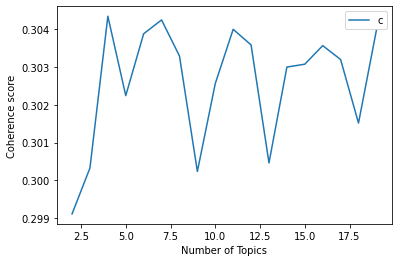

In [ ]:
x = range(2, 20, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=4,
                                       per_word_topics=True,
                                       chunksize=301641)

In [ ]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=df["tokenized"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.30557001432443087


In [ ]:
lda_model_1 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=4,
                                       per_word_topics=True)


from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_1, texts=df["tokenized"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.3041428725058777


In [ ]:
for i in lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=100):
    print(i)
    print()
#     break

(0, [('get', 0.017094756), ('feel', 0.016516455), ('like', 0.014931769), ('know', 0.012703829), ('time', 0.011680888), ('think', 0.00974809), ('day', 0.009116506), ('make', 0.009095972), ('anxiety', 0.008179935), ('want', 0.00800916), ('even', 0.00774476), ('people', 0.0077217203), ('thing', 0.0075913747), ('life', 0.0075507467), ('take', 0.006769727), ('really', 0.0066284523), ('help', 0.006593635), ('year', 0.006086381), ('say', 0.006052593), ('start', 0.005653801), ('bad', 0.0046980516), ('work', 0.00465696), ('anyone', 0.0046060025), ('one', 0.0045016846), ('tell', 0.004401595), ('good', 0.00437117), ('try', 0.004156431), ('well', 0.0038482186), ('back', 0.0038358206), ('still', 0.0038089768), ('something', 0.0037630287), ('see', 0.003743716), ('much', 0.0037084043), ('thought', 0.0036673145), ('friend', 0.003629038), ('week', 0.0035794682), ('also', 0.0035729706), ('every', 0.0035398754), ('come', 0.0034434586), ('last', 0.0033728757), ('need', 0.0032961103), ('find', 0.0032464457

In [ ]:
lda_model.get_term_topics('know')

[(0, 0.013216362), (1, 0.012538455)]

In [ ]:
 lda_assignment = [max(p,key=lambda item: item[1]) for p in lda_model[corpus]]

In [ ]:
topic_lda = []
for x in lda_assignment:
#     print(x)
#     print(x[0])
#     print(x[1])
    temp = x[0]
    topic_lda.append(temp)

In [ ]:
len(topic_lda)

301641

In [ ]:
df["lda_score"] = lda_assignment
df["lda_topic"] = topic_lda

In [ ]:
lda_topic_assignment[1][0]

2

In [ ]:
docs = lda_model.get_document_topics(corpus, minimum_probability=None, minimum_phi_value=None, per_word_topics=True)

In [ ]:
for doc in docs:
    print(doc)
    break

[(0, 0.015028685), (1, 0.0150233405), (2, 0.95488536), (3, 0.015062623)]


In [ ]:
docs[1]

[(2, 0.89089215), (3, 0.097100034)]

In [ ]:
new_list = []
for x in df["tokenized"].iloc[0]:
    new_list.append(x)


for i in new_list:
    print(i)
    print(lda_model.get_term_topics(i))
    print()

much
[]

pain
[]

want
[(1, 0.0114910975), (2, 0.01467532)]

feel
[(0, 0.01651535), (1, 0.014072044), (2, 0.0167445), (3, 0.01868661)]

numb
[]

try
[]

best
[]

drink
[]

seriously
[]

struggle
[]

today
[]

work
[]

throw
[]

morning
[]

feel
[(0, 0.01651535), (1, 0.014072044), (2, 0.0167445), (3, 0.01868661)]

terrible
[]

know
[(0, 0.012702961), (1, 0.010938677), (3, 0.010560635)]



In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

D:\Python\venv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [ ]:
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

D:\Python\venv\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.000831  0.005870       1        1  30.394137
1     -0.003847  0.000507       2        1  25.426614
3     -0.002742 -0.005328       3        1  24.456266
2      0.007420 -0.001049       4        1  19.722984, topic_info=           Term           Freq          Total Category  logprob  loglift
14         want  240745.000000  240745.000000  Default  30.0000  30.0000
2          feel  392573.000000  392573.000000  Default  29.0000  29.0000
334        talk   92129.000000   92129.000000  Default  28.0000  28.0000
272  everything   67304.000000   67304.000000  Default  27.0000  27.0000
56         like  388500.000000  388500.000000  Default  26.0000  26.0000
..          ...            ...            ...      ...      ...      ...
436         say   22268.283856  133793.331640   Topic4  -5.3523  -0.1697
109         bad   21021.516276  123468.532066   Topic4  -5.4099  -0.1471
13          try   21080.930669  125738.224068   Topic4  -5.4071  -0.1624
96       people   22241.230749  149970.561597   Topic4  -5.3535  -0.2851
151         one   19836.721960  133241.693300   Topic4  -5.4679  -0.2812

[384 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
106        1  0.311945               able
106        2  0.329740               able
106        3  0.217916               able
106        4  0.140405               able
42163      1  0.724191             acadia
...      ...       ...                ...
180        1  0.303359               year
180        2  0.285366               year
180        3  0.229112               year
180        4  0.182166               year
41931      1  0.729414  yllipytqngxnrcpgj

[785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [ ]:
pyLDAvis.save_html(LDAvis_prepared, 'PyLDA.html')

In [ ]:
LDAvis_prepared = pyLDAvis.gensim_models.prepare(test_model, corpus, id2word)
LDAvis_prepared

D:\Python\venv\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.000831  0.005870       1        1  30.394137
1     -0.003847  0.000507       2        1  25.426614
3     -0.002742 -0.005328       3        1  24.456266
2      0.007420 -0.001049       4        1  19.722984, topic_info=           Term           Freq          Total Category  logprob  loglift
14         want  240745.000000  240745.000000  Default  30.0000  30.0000
2          feel  392573.000000  392573.000000  Default  29.0000  29.0000
334        talk   92129.000000   92129.000000  Default  28.0000  28.0000
272  everything   67304.000000   67304.000000  Default  27.0000  27.0000
56         like  388500.000000  388500.000000  Default  26.0000  26.0000
..          ...            ...            ...      ...      ...      ...
436         say   22268.283856  133793.331640   Topic4  -5.3523  -0.1697
109         bad   21021.516276  123468.532066   Topic4  -5.4099  -0.1471
13          try   21080.930669  125738.224068   Topic4  -5.4071  -0.1624
96       people   22241.230749  149970.561597   Topic4  -5.3535  -0.2851
151         one   19836.721960  133241.693300   Topic4  -5.4679  -0.2812

[384 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
106        1  0.311945               able
106        2  0.329740               able
106        3  0.217916               able
106        4  0.140405               able
42163      1  0.724191             acadia
...      ...       ...                ...
180        1  0.303359               year
180        2  0.285366               year
180        3  0.229112               year
180        4  0.182166               year
41931      1  0.729414  yllipytqngxnrcpgj

[785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [ ]:
from gensim.test.utils import datapath

# Save model to disk.
temp_file = datapath("/Model")
lda_model.save(temp_file)

# Load a potentially pretrained model from disk.
# lda = LdaModel.load(temp_file)

In [ ]:
lda_model.save("Model/Model_LDA.model")

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel.load("Model/Model_LDA.model")

In [ ]:
corpus_lda = lda_model[corpus]

for doc in corpus_lda:
    print(len(doc))
    print(doc[0])
    print(doc[1])
    print(doc[2])
    print(doc[3])
    break

In [ ]:
corpus_lsi = lda_model[corpus]

score1 = []
score2 = []
score3 = []
score4 = []
score5 = []
score6 = []


index = 0
for doc in corpus_lsi:
    print(index)
    index += 1
    if len(doc)>0:
        print(doc)
        print()
        score1.append(round(doc[0][1],2))
        score2.append(round(doc[1][1],2))
        score3.append(round(doc[2][1],2))
        score4.append(round(doc[3][1],2))
        score5.append(round(doc[4][1],2))
        score6.append(round(doc[5][1],2))
    else:
        score1.append(0)
        score2.append(0)
        score3.append(0)
        score4.append(0)
        score5.append(0)
        score6.append(0)

In [ ]:
# find the scores given between the review and each topic
corpus_lsi = lda_model[corpus]

score1 = []
score2 = []
score3 = []
score4 = []
score5 = []
score6 = []


index = 0
for doc in corpus_lsi:
    print(index)
    index += 1
    if len(doc)>0:
        print(doc)
        score1.append(round(doc[0][1],2))
        score2.append(round(doc[1][1],2))
        score3.append(round(doc[2][1],2))
        score4.append(round(doc[3][1],2))
        score5.append(round(doc[4][1],2))
        score6.append(round(doc[5][1],2))
    else:
        score1.append(0)
        score2.append(0)
        score3.append(0)
        score4.append(0)
        score5.append(0)
        score6.append(0)


# create data frame that shows scores assigned for both topics for each review
df_topic = pd.DataFrame()
df_topic['Text'] = df['cleaned_text_new']
df_topic['Topic 0 score'] = score1
df_topic['Topic 1 score'] = score2
df_topic['Topic 2 score'] = score3
df_topic['Topic 3 score'] = score4
df_topic['Topic 4 score'] = score5
df_topic['Topic 5 score'] = score6

df_topic['Topic']= df_topic[['Topic 0 score', 'Topic 1 score', 'Topic 2 score', 'Topic 3 score', 'Topic 4 score', 'Topic 5 score']].apply(lambda x: x.argmax(), axis=1)
df_topic.head(1)

In [ ]:
df

,created_utc,cleaned_text_new,subreddit,tokenized,lda_score,lda_topic
0,1624922126,much pain want feel numb try best drink seriou...,mentalillness,"[much, pain, want, feel, numb, try, best, drin...","(2, 0.58003)",2
1,1624918822,neighbour purposely push edge snap end prison ...,mentalillness,"[neighbour, purposely, push, edge, snap, end, ...","(2, 0.9551276)",2
2,1624914382,type therapy call call exposed something phobi...,mentalillness,"[type, therapy, call, call, exposed, something...","(2, 0.95649934)",2
3,1624913757,got diagnose finally grant still people turn f...,mentalillness,"[got, diagnose, finally, grant, still, people,...","(1, 0.42206907)",1
4,1624913158,early warning sign schizophrenia anxiety old o...,mentalillness,"[early, warning, sign, schizophrenia, anxiety,...","(2, 0.8108623)",2
...,...,...,...,...,...,...
301636,1353823398,anyone else succeed holistic method backstory ...,schizophrenia,"[anyone, else, succeed, holistic, method, back...","(1, 0.75203776)",1
301637,1356932500,help symptom think schizophrenia think illness...,schizophrenia,"[help, symptom, think, schizophrenia, think, i...","(2, 0.7272292)",2
301638,1356919868,schizophrenia usually start december the start...,schizophrenia,"[schizophrenia, usually, start, december, the,...","(2, 0.7733166)",2
301639,1356903480,talk realize public place random think somethi...,schizophrenia,"[talk, realize, public, place, random, think, ...","(2, 0.6638243)",2


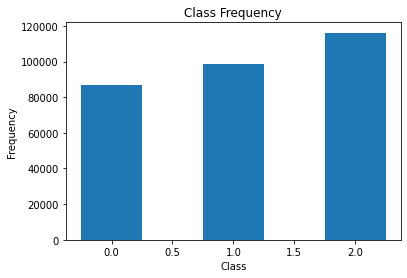

In [ ]:
unique, counts = np.unique(df["lda_topic"], return_counts=True)
plt.bar(unique, counts, 0.5)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

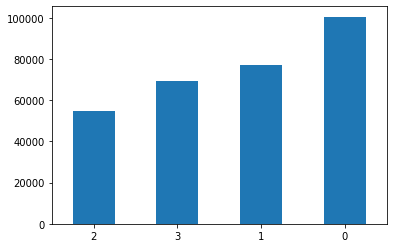

In [ ]:
df['lda_topic'].value_counts().plot(kind='bar', rot=0).invert_xaxis()

In [ ]:
df["lda_topic"].value_counts()

0    100501
1     76941
3     69387
2     54812
Name: lda_topic, dtype: int64

In [ ]:
df.to_parquet('FINAL_DATA_FOR_LDA.parquet')

In [ ]:
df = pd.read_parquet('FINAL_DATA_FOR_LDA_BALANCED.parquet', engine='pyarrow')
df

,created_utc,cleaned_text_new,subreddit,tokenized,lda_score,lda_topic
260025,1651366280,hey guy new relatively newly diagnose year ago...,schizophrenia,"[hey, guy, new, relatively, newly, diagnose, y...","[0.0, 0.8250479698181152]",0
261068,1602717142,someone get diagnose even know lot symptom run...,schizophrenia,"[someone, get, diagnose, even, know, lot, symp...","[0.0, 0.6394087076187134]",0
253183,1645986475,aware psychosis felt right awhile get nervous ...,schizophrenia,"[aware, psychosis, felt, right, awhile, get, n...","[0.0, 0.9390579462051392]",0
146156,1644413269,sound familiar experience anxiety year experie...,Anxiety,"[sound, familiar, experience, anxiety, year, e...","[0.0, 0.551270067691803]",0
278549,1584322446,hallucination be reality persecutory hallucina...,schizophrenia,"[hallucination, reality, persecutory, hallucin...","[0.0, 0.5249367952346802]",0
...,...,...,...,...,...,...
301570,1395807144,schizophrenic tic twitch medication moment muc...,schizophrenia,"[schizophrenic, tic, twitch, medication, momen...","[2.0, 0.9631268382072449]",2
301571,1395792004,adder all type a asked psychiatrist put attent...,schizophrenia,"[adder, all, type, asked, psychiatrist, put, a...","[2.0, 0.775640606880188]",2
301576,1395628840,schizophrenic score reason test take test shar...,schizophrenia,"[schizophrenic, score, reason, test, take, tes...","[2.0, 0.5185246467590332]",2
301606,1356537154,good link current research euro electro chemic...,schizophrenia,"[good, link, current, research, euro, electro,...","[2.0, 0.8387064337730408]",2


In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['cleaned_text_new'], df['lda_topic'], test_size=0.2, random_state=42)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['cleaned_text_new'])
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)


# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000)
tfidf_vect.fit(df['cleaned_text_new'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=100000)
tfidf_vect_ngram.fit(df['cleaned_text_new'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

## MNB

In [ ]:
classifier = naive_bayes.MultinomialNB()

In [ ]:
%%time
# Naive Bayes on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("NB, Count Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

NB, Count Vectors: 
              precision    recall  f1-score   support

           0       0.67      0.59      0.63     12285
           1       0.59      0.58      0.59     11152
           2       0.54      0.70      0.61      8508
           3       0.67      0.61      0.64     11905

    accuracy                           0.62     43850
   macro avg       0.62      0.62      0.61     43850
weighted avg       0.62      0.62      0.62     43850

0.6152337514253136
CPU times: total: 109 ms
Wall time: 110 ms


In [ ]:
%%time
# Naive Bayes on Word Level TF IDF Vectors
classifier.fit(xtrain_tfidf, train_y)
y_pred = classifier.predict(xvalid_tfidf)

print("NB, WordLevel TF-IDF: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

NB, WordLevel TF-IDF: 
              precision    recall  f1-score   support

           0       0.63      0.60      0.62     11472
           1       0.59      0.57      0.58     11220
           2       0.52      0.70      0.60      8363
           3       0.69      0.59      0.63     12795

    accuracy                           0.61     43850
   macro avg       0.61      0.62      0.61     43850
weighted avg       0.62      0.61      0.61     43850

0.6089851767388825
CPU times: total: 93.8 ms
Wall time: 96.2 ms


In [ ]:
%%time
# Naive Bayes on Ngram Level TF IDF Vectors
classifier.fit(xtrain_tfidf_ngram, train_y)
y_pred = classifier.predict(xvalid_tfidf_ngram)

print("NB, N-Gram Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

NB, N-Gram Vectors: 
              precision    recall  f1-score   support

           0       0.64      0.57      0.60     12122
           1       0.57      0.57      0.57     10971
           2       0.51      0.68      0.58      8343
           3       0.66      0.58      0.62     12414

    accuracy                           0.59     43850
   macro avg       0.59      0.60      0.59     43850
weighted avg       0.60      0.59      0.59     43850

0.5939110604332953
CPU times: total: 109 ms
Wall time: 107 ms


## LR

In [ ]:
classifier = linear_model.LogisticRegression()

In [ ]:
%%time
# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, Count Vectors: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     10797
           1       0.88      0.87      0.87     11017
           2       0.88      0.89      0.89     11092
           3       0.88      0.88      0.88     10944

    accuracy                           0.88     43850
   macro avg       0.88      0.88      0.88     43850
weighted avg       0.88      0.88      0.88     43850

0.8796807297605473
CPU times: total: 11.2 s
Wall time: 11.3 s


In [ ]:
%%time
# Linear Classifier on Word Level TF IDF Vectors
classifier.fit(xtrain_tfidf, train_y)
y_pred = classifier.predict(xvalid_tfidf)

print("LR, WordLevel TF-IDF: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, WordLevel TF-IDF: 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10568
           1       0.87      0.86      0.87     11055
           2       0.89      0.88      0.88     11268
           3       0.88      0.87      0.87     10959

    accuracy                           0.88     43850
   macro avg       0.88      0.88      0.88     43850
weighted avg       0.88      0.88      0.88     43850

0.8758266818700114
CPU times: total: 10.4 s
Wall time: 10.4 s


In [ ]:
%%time
# Linear Classifier on Ngram Level TF IDF Vectors
classifier.fit(xtrain_tfidf_ngram, train_y)
y_pred = classifier.predict(xvalid_tfidf_ngram)

print("LR, N-Gram Vector: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, N-Gram Vector: 
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     10629
           1       0.63      0.63      0.63     10851
           2       0.65      0.65      0.65     11062
           3       0.67      0.64      0.66     11308

    accuracy                           0.65     43850
   macro avg       0.65      0.65      0.65     43850
weighted avg       0.65      0.65      0.65     43850

0.6489167616875713
CPU times: total: 13.5 s
Wall time: 13.6 s


## XGBoost

In [ ]:
classifier = xgboost.XGBClassifier()

In [ ]:
%%time
# Extereme Gradient Boosting on Count Vectors
classifier.fit(xtrain_count.tocsc(), train_y)
y_pred = classifier.predict(xvalid_count.tocsc())

print("Xgb, Count Vector: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

Xgb, Count Vector: 
              precision    recall  f1-score   support

           0       0.66      0.68      0.67     10612
           1       0.64      0.64      0.64     11004
           2       0.66      0.68      0.67     10875
           3       0.68      0.66      0.67     11359

    accuracy                           0.66     43850
   macro avg       0.66      0.66      0.66     43850
weighted avg       0.66      0.66      0.66     43850

0.6615507411630559
CPU times: total: 9min 12s
Wall time: 32.4 s


In [ ]:
%%time
# Extereme Gradient Boosting on Word Level TF IDF Vectors
classifier.fit(xtrain_tfidf.tocsc(), train_y)
y_pred = classifier.predict(xvalid_tfidf.tocsc())

print("Xgb, WordLevel TF-IDF: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

Xgb, WordLevel TF-IDF: 
              precision    recall  f1-score   support

           0       0.66      0.69      0.68     10470
           1       0.64      0.65      0.65     10719
           2       0.68      0.67      0.67     11329
           3       0.68      0.66      0.67     11332

    accuracy                           0.67     43850
   macro avg       0.67      0.67      0.67     43850
weighted avg       0.67      0.67      0.67     43850

0.6672519954389966
CPU times: total: 55min 47s
Wall time: 2min 53s


In [ ]:
%%time
# Extereme Gradient Boosting on N-gram Level TF IDF Vectors
classifier.fit(xtrain_tfidf_ngram.tocsc(), train_y)
y_pred = classifier.predict(xvalid_tfidf_ngram.tocsc())

print("Xgb, N-Gram Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

Xgb, N-Gram Vectors: 
              precision    recall  f1-score   support

           0       0.49      0.53      0.50     10089
           1       0.44      0.47      0.45     10152
           2       0.50      0.46      0.48     11952
           3       0.51      0.48      0.50     11657

    accuracy                           0.48     43850
   macro avg       0.48      0.48      0.48     43850
weighted avg       0.48      0.48      0.48     43850

0.4833067274800456
CPU times: total: 38min 16s
Wall time: 2min 1s


## RF

In [ ]:
classifier = ensemble.RandomForestClassifier()

In [ ]:
%%time
# RF on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("RF, Count Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

RF, Count Vectors: 
              precision    recall  f1-score   support

           0       0.64      0.56      0.60     12427
           1       0.57      0.55      0.56     11426
           2       0.51      0.65      0.57      8745
           3       0.61      0.59      0.60     11252

    accuracy                           0.58     43850
   macro avg       0.58      0.59      0.58     43850
weighted avg       0.59      0.58      0.58     43850

0.583648802736602
CPU times: total: 16min 7s
Wall time: 16min 12s


In [ ]:
%%time
# RF on Word Level TF IDF Vectors
classifier.fit(xtrain_tfidf, train_y)
y_pred = classifier.predict(xvalid_tfidf)

print("RF, WordLevel TF-IDF: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

RF, WordLevel TF-IDF: 
              precision    recall  f1-score   support

           0       0.64      0.60      0.62     11692
           1       0.55      0.58      0.57     10496
           2       0.58      0.64      0.61     10114
           3       0.63      0.60      0.61     11548

    accuracy                           0.60     43850
   macro avg       0.60      0.60      0.60     43850
weighted avg       0.60      0.60      0.60     43850

0.6025541619156214
CPU times: total: 14min 36s
Wall time: 14min 37s


In [ ]:
%%time
# RF on on Ngram Level TF IDF Vectors
classifier.fit(xtrain_tfidf_ngram, train_y)
y_pred = classifier.predict(xvalid_tfidf_ngram)

print("RF, N-Gram Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

RF, N-Gram Vectors: 
              precision    recall  f1-score   support

           0       0.55      0.50      0.52     12078
           1       0.43      0.47      0.45      9976
           2       0.44      0.51      0.47      9596
           3       0.54      0.48      0.51     12200

    accuracy                           0.49     43850
   macro avg       0.49      0.49      0.49     43850
weighted avg       0.50      0.49      0.49     43850

0.48916761687571264
CPU times: total: 23min 53s
Wall time: 24min 3s


## SVM

In [ ]:
classifier = svm.SVC()

In [ ]:
%%time
# SVM on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("SVM, Count Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

In [ ]:
%%time
# SVM on Word Level TF IDF Vectors
classifier.fit(xtrain_tfidf, train_y)
y_pred = classifier.predict(xvalid_tfidf)

print("SVM, Count Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

In [ ]:
%%time
# SVM on Ngram Level TF IDF Vectors
classifier.fit(xtrain_tfidf_ngram, train_y)
y_pred = classifier.predict(xvalid_tfidf_ngram)

print("SVM, Count Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

In [ ]:
classifier = linear_model.LogisticRegression(max_iter=1000, verbose=1)

In [ ]:
%%time
# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

In [ ]:
%%time
# Linear Classifier on Word Level TF IDF Vectors
classifier.fit(xtrain_tfidf, train_y)
y_pred = classifier.predict(xvalid_tfidf)

print("LR, WordLevel TF-IDF: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

In [ ]:
%%time
# Linear Classifier on Ngram Level TF IDF Vectors
classifier.fit(xtrain_tfidf_ngram, train_y)
y_pred = classifier.predict(xvalid_tfidf_ngram)

print("LR, N-Gram Vector: ")
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

In [ ]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['cleaned_text_new'], df['lda_topic'], test_size=0.2, random_state=42, stratify=df["lda_topic"])

In [ ]:
len(train_x)

175398

In [ ]:
len(valid_x)

43850

In [ ]:
train_y.value_counts()

0    43917
3    43916
1    43868
2    43697
Name: lda_topic, dtype: int64

In [ ]:
valid_y.value_counts()

2    11115
1    10944
3    10896
0    10895
Name: lda_topic, dtype: int64

In [ ]:
train_y.value_counts()

3    43850
1    43850
0    43849
2    43849
Name: lda_topic, dtype: int64

In [ ]:
valid_y.value_counts()

2    10963
0    10963
1    10962
3    10962
Name: lda_topic, dtype: int64

In [ ]:
solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, 
you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

In [ ]:
Warning The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:
‘newton-cg’ - [‘l2’, ‘none’]

‘lbfgs’ - [‘l2’, ‘none’]

‘liblinear’ - [‘l1’, ‘l2’]

‘sag’ - [‘l2’, ‘none’]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [ ]:
classifier = linear_model.LogisticRegression(solver="newton-cg")

In [ ]:
%%time
# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(confusion_matrix(y_pred,valid_y))
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, Count Vectors: 
[[ 9844   340   347   298]
 [  399  9811   330   407]
 [  333   351 10094   324]
 [  319   442   344  9867]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10829
           1       0.90      0.90      0.90     10947
           2       0.91      0.91      0.91     11102
           3       0.91      0.90      0.90     10972

    accuracy                           0.90     43850
   macro avg       0.90      0.90      0.90     43850
weighted avg       0.90      0.90      0.90     43850

0.9034435575826681
CPU times: total: 2min 37s
Wall time: 2min 38s


In [ ]:
%%time
classifier.fit(xtrain_count, train_y)
y_pred_1 = classifier.predict(xtrain_count)
print(confusion_matrix(y_pred_1,train_y))
print(classification_report(y_pred_1,train_y)) 
print(accuracy_score(y_pred_1,train_y))

[[42682   359   206   258]
 [  471 42756   239   376]
 [  418   355 43028   301]
 [  346   398   224 42981]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     43505
           1       0.97      0.98      0.97     43842
           2       0.98      0.98      0.98     44102
           3       0.98      0.98      0.98     43949

    accuracy                           0.98    175398
   macro avg       0.98      0.98      0.98    175398
weighted avg       0.98      0.98      0.98    175398

0.9774740875038483


In [ ]:
train_acc = 0.9775
test_acc = 0.9034



<AxesSubplot:>

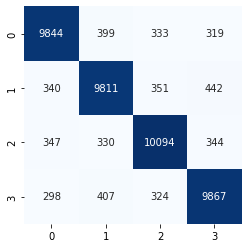

In [ ]:
import seaborn as sns
conf_mat = confusion_matrix(valid_y, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
classifier = linear_model.LogisticRegression(solver="sag")

In [ ]:
%%time
# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(confusion_matrix(y_pred,valid_y))
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, Count Vectors: 
[[7698 1274 1599 1063]
 [1264 7324 1276 1379]
 [ 877 1017 6922  903]
 [1056 1329 1318 7551]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.68     11634
           1       0.67      0.65      0.66     11243
           2       0.62      0.71      0.66      9719
           3       0.69      0.67      0.68     11254

    accuracy                           0.67     43850
   macro avg       0.67      0.67      0.67     43850
weighted avg       0.67      0.67      0.67     43850

0.6726339794754846
CPU times: total: 25.1 s
Wall time: 25.2 s


In [ ]:
classifier = linear_model.LogisticRegression(solver="saga")

In [ ]:
%%time
# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(confusion_matrix(y_pred,valid_y))
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, Count Vectors: 
[[7477 1461 1981 1222]
 [1327 6910 1382 1458]
 [ 875 1074 6224  909]
 [1216 1499 1528 7307]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65     12141
           1       0.63      0.62      0.63     11077
           2       0.56      0.69      0.62      9082
           3       0.67      0.63      0.65     11550

    accuracy                           0.64     43850
   macro avg       0.64      0.64      0.64     43850
weighted avg       0.64      0.64      0.64     43850

0.6366704675028506
CPU times: total: 30 s
Wall time: 30 s


In [ ]:
classifier = linear_model.LogisticRegression(solver="lbfgs")

In [ ]:
%%time
# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(confusion_matrix(y_pred,valid_y))
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LR, Count Vectors: 
[[9569  421  431  376]
 [ 500 9578  419  520]
 [ 420  429 9835  408]
 [ 406  516  430 9592]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     10797
           1       0.88      0.87      0.87     11017
           2       0.88      0.89      0.89     11092
           3       0.88      0.88      0.88     10944

    accuracy                           0.88     43850
   macro avg       0.88      0.88      0.88     43850
weighted avg       0.88      0.88      0.88     43850

0.8796807297605473
CPU times: total: 14.9 s
Wall time: 14.9 s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s finished


In [ ]:
type(xtrain_count)

scipy.sparse._csr.csr_matrix

In [ ]:
xtrain_count

<175398x42080 sparse matrix of type '<class 'numpy.int64'>'
	with 10580812 stored elements in Compressed Sparse Row format>

In [ ]:
classifier = linear_model.LogisticRegression(solver="newton-cg", penalty="none")

In [ ]:
%%time
# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(confusion_matrix(y_pred,valid_y))
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, Count Vectors: 
[[9667  510  499  426]
 [ 469 9450  477  560]
 [ 351  417 9678  424]
 [ 408  567  461 9486]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11102
           1       0.86      0.86      0.86     10956
           2       0.87      0.89      0.88     10870
           3       0.87      0.87      0.87     10922

    accuracy                           0.87     43850
   macro avg       0.87      0.87      0.87     43850
weighted avg       0.87      0.87      0.87     43850

0.8729988597491448
CPU times: total: 19min 4s
Wall time: 19min 9s


In [ ]:
classifier = linear_model.LogisticRegression(solver="lbfgs", penalty="none")

In [ ]:
%%time
# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(confusion_matrix(y_pred,valid_y))
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, Count Vectors: 
[[9546  423  445  365]
 [ 496 9550  432  491]
 [ 425  431 9790  384]
 [ 428  540  448 9656]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     10779
           1       0.87      0.87      0.87     10969
           2       0.88      0.89      0.88     11030
           3       0.89      0.87      0.88     11072

    accuracy                           0.88     43850
   macro avg       0.88      0.88      0.88     43850
weighted avg       0.88      0.88      0.88     43850

0.8789509692132269
CPU times: total: 12.5 s
Wall time: 12.6 s


In [ ]:
%%time
classifier = linear_model.LogisticRegression(solver="newton-cg", max_iter=1000)


# Linear Classifier on Count Vectors
classifier.fit(xtrain_count, train_y)
y_pred = classifier.predict(xvalid_count)

print("LR, Count Vectors: ")
print(confusion_matrix(y_pred,valid_y))
print(classification_report(y_pred,valid_y)) 
print(accuracy_score(y_pred,valid_y))

LR, Count Vectors: 
[[ 9844   340   347   298]
 [  399  9811   330   407]
 [  333   351 10094   324]
 [  319   442   344  9867]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10829
           1       0.90      0.90      0.90     10947
           2       0.91      0.91      0.91     11102
           3       0.91      0.90      0.90     10972

    accuracy                           0.90     43850
   macro avg       0.90      0.90      0.90     43850
weighted avg       0.90      0.90      0.90     43850

0.9034435575826681
CPU times: total: 2min 11s
Wall time: 2min 11s


In [ ]:
iter_list = [100, 500, 1000, 1500, 2000]
acc_list = []

for x in range(len(iter_list)):
    print(iter_list[x])
    classifier = linear_model.LogisticRegression(solver="newton-cg", max_iter=iter_list[x])
    
    classifier.fit(xtrain_count, train_y)
    y_pred = classifier.predict(xvalid_count)
    
    print(confusion_matrix(y_pred,valid_y))
    print(classification_report(y_pred,valid_y)) 
    print(accuracy_score(y_pred,valid_y))
    
    acc_list.append(round(accuracy_score(y_pred,valid_y), 2))
    print()
    print()

100
[[ 9844   340   347   298]
 [  399  9811   330   407]
 [  333   351 10094   324]
 [  319   442   344  9867]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10829
           1       0.90      0.90      0.90     10947
           2       0.91      0.91      0.91     11102
           3       0.91      0.90      0.90     10972

    accuracy                           0.90     43850
   macro avg       0.90      0.90      0.90     43850
weighted avg       0.90      0.90      0.90     43850

0.9034435575826681


500
[[ 9844   340   347   298]
 [  399  9811   330   407]
 [  333   351 10094   324]
 [  319   442   344  9867]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10829
           1       0.90      0.90      0.90     10947
           2       0.91      0.91      0.91     11102
           3       0.91      0.90      0.90     10972

    accuracy                           0.90   

KeyboardInterrupt: 

In [ ]:
iter_list = [100, 500, 1000, 1500, 2000]
acc_list = []

for x in range(len(iter_list)):
    print(iter_list[x])
    classifier = linear_model.LogisticRegression(solver="lbfgs", max_iter=iter_list[x])
    
    classifier.fit(xtrain_count, train_y)
    y_pred = classifier.predict(xvalid_count)
    
    print(confusion_matrix(y_pred,valid_y))
    print(classification_report(y_pred,valid_y)) 
    print(accuracy_score(y_pred,valid_y))
    
    acc_list.append(round(accuracy_score(y_pred,valid_y), 2))
    print()
    print()

100
[[9569  421  431  376]
 [ 500 9578  419  520]
 [ 420  429 9835  408]
 [ 406  516  430 9592]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     10797
           1       0.88      0.87      0.87     11017
           2       0.88      0.89      0.89     11092
           3       0.88      0.88      0.88     10944

    accuracy                           0.88     43850
   macro avg       0.88      0.88      0.88     43850
weighted avg       0.88      0.88      0.88     43850

0.8796807297605473


500
[[ 9851   340   346   297]
 [  397  9816   336   409]
 [  329   348 10089   322]
 [  318   440   344  9868]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10834
           1       0.90      0.90      0.90     10958
           2       0.91      0.91      0.91     11088
           3       0.91      0.90      0.90     10970

    accuracy                           0.90     43850
   macro

In [ ]:
import matplotlib.pyplot as plt

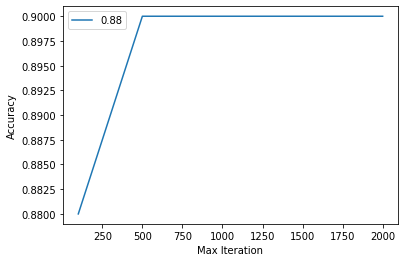

In [ ]:
x = range(2, 20, 1)
plt.plot(iter_list, acc_list)
plt.xlabel("Max Iteration")
plt.ylabel("Accuracy")
plt.legend((acc_list), loc='best')
plt.show()